In [84]:
# import umap
import umap.plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
import seaborn as sns



In [90]:
n_channel = 160
model_dir = "/home/sheida.rahnamai/GIT/HDN/examples/Pixel_Noise/Convallaria/Contrastive_1e-2/model/"
mus = np.array([])
mu_golgi = np.load(model_dir+'mu_golgi.npy')
mu_mitochondria = np.load(model_dir+'mu_mitochondria.npy')
mu_granule = np.load(model_dir+'mu_granule.npy')
print(mu_golgi.shape)
print(mu_mitochondria.shape)
print(mu_granule.shape)

(738, 160)
(1120, 160)
(1050, 160)


In [91]:

mus = np.append(mus, mu_golgi).reshape(-1, n_channel)
print(mus.shape)
mus = np.append(mus, mu_mitochondria).reshape(-1,n_channel)
print(mus.shape)
mus = np.append(mus, mu_granule).reshape(-1,n_channel)
print(mus.shape)



(738, 160)
(1858, 160)
(2908, 160)


In [87]:
labels = ['Golgi'] * 738
for i in range(1120):
    labels.append('Mitochondria')
for i in range(1050):
    labels.append('Granule')
print(type(labels))
labels = np.asarray(labels)
print(type(labels))

<class 'list'>
<class 'numpy.ndarray'>


In [88]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(mus)
umap.plot.points(embedding, labels=labels, color_key_cmap='rainbow', background='white')

/home/sheida.rahnamai/miniconda3/envs/maester/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


ValueError: Could not find embedding attribute of umap_object

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

In [92]:

reducer = Isomap(n_components=2, metric='euclidean')
# reducer = TSNE(n_components=2, learning_rate='auto', init='random', metric='cosine', n_iter= 10000, n_iter_without_progress=500).fit_transform(mus)
# reducer = Isomap(n_components=2, metric='cosine')
# reducer = cvae.CompressionVAE(mus)
# reducer.train()
# embedding = reducer.embed(mus)
embedding = reducer.fit_transform(mus)
print(embedding.shape)


/home/sheida.rahnamai/miniconda3/envs/maester/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 87 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sheida.rahnamai/miniconda3/envs/maester/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sheida.rahnamai/miniconda3/envs/maester/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sheida.rahnamai/miniconda3/envs/maester/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of 

(2908, 2)


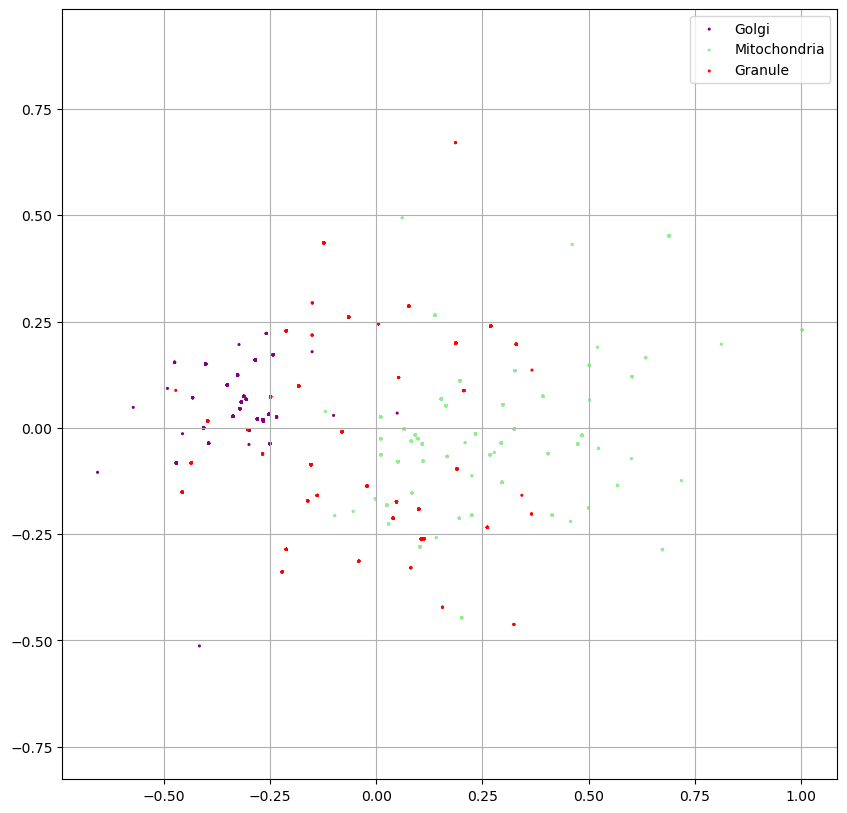

In [93]:

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.scatter(embedding[:738,0], embedding[:738,1], c='purple', s=5, label='Golgi', alpha=1, edgecolors='none')
ax.scatter(embedding[738:1858,0], embedding[738:1858,1], c='lightgreen', s=5, label='Mitochondria', alpha=1, edgecolors='none')
ax.scatter(embedding[1858:,0], embedding[1858:,1], c='red', s=5, label='Granule', alpha=1, edgecolors='none')


ax.legend()
ax.grid(True)
plt.gca().set_aspect('equal', 'datalim')
plt.show()

In [116]:
x_min = 0
x_max = 0.1
y_min = 0
y_max = 0.1
x_filter = np.logical_and(embedding[:,0] > x_min, embedding[:,0] < x_max)
y_filter = np.logical_and(embedding[:,1] > y_min, embedding[:,1] < y_max)
filter_ = np.logical_and(x_filter, y_filter)
# list of indices where the filter is True
filtered_indices = np.where(filter_)[0]


In [105]:
from tifffile import imread
data_dir = "/group/jug/Sheida/pancreatic beta cells/download/high_c1/contrastive/patches/"
golgi = imread(data_dir+'golgi/*.tif')
mitochondria = imread(data_dir+'mitochondria/*.tif')
granule = imread(data_dir+'granules/*.tif')
all_data = np.concatenate([golgi, mitochondria, granule],axis=0)


In [109]:
embedding[filtered_indices]

array([[0.04949377, 0.03466814],
       [0.0110707 , 0.02565194],
       [0.01107069, 0.02565193],
       [0.01107071, 0.02565191],
       [0.01108616, 0.02562577],
       [0.01107069, 0.02565194],
       [0.01107071, 0.02565191],
       [0.01107071, 0.02565191],
       [0.01107069, 0.02565194],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01106751, 0.02565   ],
       [0.01107632, 0.02563499],
       [0.01106687, 0.02565511],
       [0.

array([0.])

[[0.01107069 0.02565193]
 [0.01107069 0.02565193]
 [0.01107069 0.02565193]]
[0.]


(2908, 64, 64)

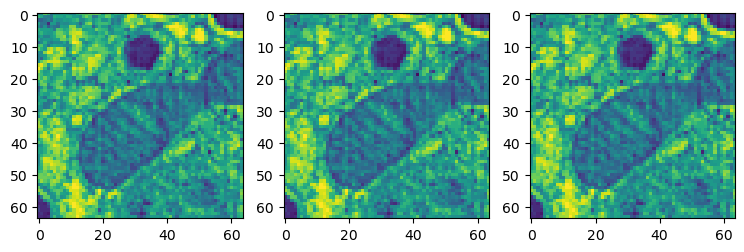

In [121]:
import matplotlib.pyplot as plt
idx1 = 10
idx2 = 11
idx3 = 12
print(embedding[
    [filtered_indices[idx1], filtered_indices[idx2], filtered_indices[idx3]]
    ])
_,ax = plt.subplots(figsize=(9,3),ncols=3)
ax[0].imshow(all_data[filtered_indices[idx1]])
ax[1].imshow(all_data[filtered_indices[idx2]])
ax[2].imshow(all_data[filtered_indices[idx3]])
print(np.unique(all_data[filtered_indices[idx1]] - all_data[filtered_indices[idx2]]))
all_data.shape

(array([  64,  742,  790,  802,  804,  873,  889, 1003, 1028, 1036, 1044,
        1192, 1223, 1225, 1257, 1261, 1302, 1326, 1347, 1357, 1483, 1484,
        1557, 1586, 1588, 1603, 1608, 1625, 1646, 1707, 1710, 1783, 1793,
        1796, 1804, 1835, 1853]),)

In [100]:
embedding[filter_]

array([[0.04949377, 0.03466814],
       [0.0110707 , 0.02565194],
       [0.01107069, 0.02565193],
       [0.01107071, 0.02565191],
       [0.01108616, 0.02562577],
       [0.01107069, 0.02565194],
       [0.01107071, 0.02565191],
       [0.01107071, 0.02565191],
       [0.01107069, 0.02565194],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01107069, 0.02565193],
       [0.01106751, 0.02565   ],
       [0.01107632, 0.02563499],
       [0.01106687, 0.02565511],
       [0.

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
embedding = pca.fit_transform(mus)
print(mus.shape)
print(embedding.shape)

(2908, 160)
(2908, 3)


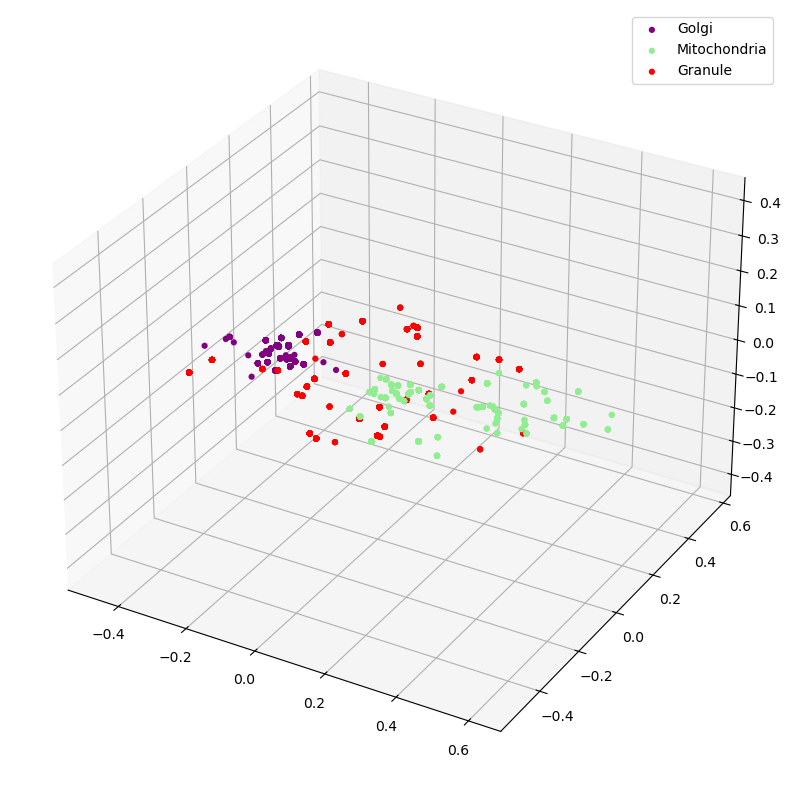

In [81]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_figheight(10)
fig.set_figwidth(10)
ax.scatter(embedding[:738,0], embedding[:738,1], c='purple', s=20, label='Golgi', alpha=1, edgecolors='none')
ax.scatter(embedding[738:1858,0], embedding[738:1858,1], c='lightgreen', s=20, label='Mitochondria', alpha=1, edgecolors='none')
ax.scatter(embedding[1858:,0], embedding[1858:,1], c='red', s=20, label='Granule', alpha=1, edgecolors='none')


ax.legend()
ax.grid(True)
plt.gca().set_aspect('equal', 'datalim')
plt.show()